## Import de Librerias

In [16]:
import face_recognition
from extraccion_de_caracteristicas import load_json
import time
import os 
import numpy as np

## Carga de los encodings del Dataset

In [17]:
dataset = load_json()

In [18]:

ERES_VALERIA = False

def formateoPath(path, ERES_VALERIA = False):
    if ERES_VALERIA:
        parts = path.split('/')
        startIndex = len(parts) - 3 
        result = "../"+('/'.join(parts[startIndex:]))
    else:
        result = path
    return result

## Pruebas

In [19]:
N_values = [100,200,400,800,1600,3200,6400,12800]
k = 8   # fijo
image_path = "./test/teofilo.png"
query_image = face_recognition.load_image_file(image_path)
faces_encoding = face_recognition.face_encodings(query_image)

### KNN Sequential

In [20]:
import face_recognition
import heapq as pq

In [21]:
def knn_pq(faces_encoding, dataset, k):
    result = []
    for path, matrix_vector_faces in dataset:
        for distance in face_recognition.face_distance(matrix_vector_faces, faces_encoding):
            #result.append((os.path.basename(path), distance))
            pq.heappush(result, (distance, formateoPath(path, ERES_VALERIA)))

    resultK = pq.nsmallest(k , result)

    return [formateoPath(path, ERES_VALERIA) for distance, path in resultK]


In [22]:
''' Testeando KNN-Secuencial PQ'''
print("KNN-Secuencial PQ TEST")
for n in N_values:
    print("N =",n)
    start_time = time.time()
    data = dataset[:n]
    knn_PQ = knn_pq(faces_encoding, data, k)
    print(knn_PQ)
    end_time = time.time()
    tiempo_ejecucion = end_time - start_time
    print("El tiempo de exec es: ", tiempo_ejecucion)

KNN-Secuencial PQ TEST
N = 100
['../images/Angel_Maza/Angel_Maza_0001.jpg', '../images/Anthony_Pico/Anthony_Pico_0001.jpg', '../images/Reginald_Hudlin/Reginald_Hudlin_0001.jpg', '../images/Mike_Smith/Mike_Smith_0001.jpg', '../images/Xiang_Huaicheng/Xiang_Huaicheng_0001.jpg', '../images/Dragan_Covic/Dragan_Covic_0001.jpg', '../images/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0001.jpg', '../images/Mohammad_Fares/Mohammad_Fares_0001.jpg']
El tiempo de exec es:  0.009989023208618164
N = 200
['../images/Wilbert_Elki_Meza_Majino/Wilbert_Elki_Meza_Majino_0001.jpg', '../images/Jeong_Se-hyun/Jeong_Se-hyun_0001.jpg', '../images/Jeong_Se-hyun/Jeong_Se-hyun_0009.jpg', '../images/Jeong_Se-hyun/Jeong_Se-hyun_0003.jpg', '../images/Jeong_Se-hyun/Jeong_Se-hyun_0006.jpg', '../images/Angel_Maza/Angel_Maza_0001.jpg', '../images/Jeong_Se-hyun/Jeong_Se-hyun_0008.jpg', '../images/Jeong_Se-hyun/Jeong_Se-hyun_0005.jpg']
El tiempo de exec es:  0.003999471664428711
N = 400
['../images/George_Lopez/George_Lopez_0

### KNN Range Search

In [23]:
def select_representative_radio(mean_distance, std_distance):
    # regla empírica
    r1 = mean_distance - std_distance
    r2 = mean_distance - 2 * std_distance
    r3 = mean_distance - 3 * std_distance

    return [r1, r2, r3]

def distances(dataset):
    vector_dist = []
    for path, matrix_vector_faces in dataset:
        for distance in face_recognition.face_distance(matrix_vector_faces, faces_encoding):
            vector_dist.append(distance)

    return list((np.mean(vector_dist), np.std(vector_dist)))

distances = distances(dataset)
radios = select_representative_radio(distances[0],distances[1])
print("Estos son los radios para probar de manera representativa segun la distribucion de la data")
print(radios)


Estos son los radios para probar de manera representativa segun la distribucion de la data
[0.7105035767903466, 0.6211339289501427, 0.5317642811099389]


In [24]:
def range_search(faces_encoding, dataset, radio):
    result = []
    for path, matrix_vector_faces in dataset:
        for distance in face_recognition.face_distance(matrix_vector_faces, faces_encoding):
            if distance < radio:
                result.append(( formateoPath(path, ERES_VALERIA), distance))

    if len(result):
        result = sorted(result, key = lambda x: x[1])
        return [path for path, dis in result]

In [25]:
''' Testeando KNN-Secuencial RS '''
print("KNN-Secuencial Range Search TEST")
for i in radios:
    print("Testing with r =", i)
    for n in N_values:
        print("N =",n)
        start_time = time.time()
        data = dataset[:n]
        knn_Search = range_search(faces_encoding, data, i)
        print(knn_Search)
        end_time = time.time()
        tiempo_ejecucion = end_time - start_time
        print("El tiempo de exec es: ", tiempo_ejecucion)
    print("\n\n")

KNN-Secuencial Range Search TEST
Testing with r = 0.7105035767903466
N = 100
['../images/Angel_Maza/Angel_Maza_0001.jpg', '../images/Anthony_Pico/Anthony_Pico_0001.jpg', '../images/Reginald_Hudlin/Reginald_Hudlin_0001.jpg', '../images/Mike_Smith/Mike_Smith_0001.jpg', '../images/Xiang_Huaicheng/Xiang_Huaicheng_0001.jpg', '../images/Dragan_Covic/Dragan_Covic_0001.jpg', '../images/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0001.jpg']
El tiempo de exec es:  0.0020058155059814453
N = 200
['../images/Wilbert_Elki_Meza_Majino/Wilbert_Elki_Meza_Majino_0001.jpg', '../images/Jeong_Se-hyun/Jeong_Se-hyun_0001.jpg', '../images/Jeong_Se-hyun/Jeong_Se-hyun_0009.jpg', '../images/Jeong_Se-hyun/Jeong_Se-hyun_0003.jpg', '../images/Jeong_Se-hyun/Jeong_Se-hyun_0006.jpg', '../images/Angel_Maza/Angel_Maza_0001.jpg', '../images/Jeong_Se-hyun/Jeong_Se-hyun_0008.jpg', '../images/Jeong_Se-hyun/Jeong_Se-hyun_0005.jpg', '../images/Jeong_Se-hyun/Jeong_Se-hyun_0002.jpg', '../images/Anthony_Pico/Anthony_Pico_0001.jpg'

### RTree

In [26]:
import math
import rtree

In [27]:
def rtree_index(n, dataset):
    #1- borrando archivos anteriores
    pathFolder = "./knn/rtree/"
    if os.path.exists(pathFolder+"rtree_feat_vector_"+str(n)+".dat"):
        os.remove(pathFolder+"rtree_feat_vector_"+str(n)+".dat")
    if os.path.exists(pathFolder+"rtree_feat_vector_"+str(n)+".idx"):
        os.remove(pathFolder+"rtree_feat_vector_"+str(n)+".idx") 

    # Configurar las propiedades del índice R-tree
    properties = rtree.index.Property()
    properties.dimension = 128  # Tamaño del vector característico
    properties.buffering_capacity = 8
    # Crear el índice R-tree
    idx = rtree.index.Index(pathFolder+"rtree_feat_vector_"+str(n), properties=properties)

    # Construir el índice si está vacío
    if idx.get_size() < 1:
        c = 0
        for path, matrix_vector_faces in dataset[:n]:
            q = tuple(matrix_vector_faces)
            idx.insert(c, q)
            #for vector in matrix_vector_faces:
            #    q = tuple(vector)
            #    idx.insert(c, q)
            c+=1
    idx.close()

In [28]:
print("Generando RTree Indexes")
for n in N_values:
    print("N =",n)
    start_time = time.time()
    rtree_index(n, dataset[:n])
    end_time = time.time()
    tiempo_ejecucion = end_time - start_time
    print(tiempo_ejecucion)

Generando RTree Indexes
N = 100


OSError: Unable to open file './knn/rtree/rtree_feat_vector_100.idx' for index storage

In [ ]:
def knn_rtree(faces_encoding, k, n, dataset):
    '''
    #1- borrando archivos anteriores
    if os.path.exists(index_name+"feature_vector.dat"):
        os.remove(index_name+"feature_vector.dat")
    if os.path.exists(index_name+"feature_vector.idx"):
        os.remove(index_name+"feature_vector.idx") 
    '''
    # Configurar las propiedades del índice R-tree
    properties = rtree.index.Property()
    properties.dimension = 128  # Tamaño del vector característico
    properties.buffering_capacity = 8
    # Crear el índice R-tree
    idx = rtree.index.Index("./knn/rtree/rtree_feat_vector_"+str(n), properties=properties)

    # Construir el índice si está vacío
    if idx.get_size() < 1:
        c = 0
        for path, matrix_vector_faces in dataset:
            q = tuple(matrix_vector_faces)
            idx.insert(c, q)
            #for vector in matrix_vector_faces:
            #    q = tuple(vector)
            #    idx.insert(c, q)
            c+=1

    # Realizar la consulta kNN
    query = tuple(faces_encoding[0])
    results = list(idx.nearest(coordinates=query, num_results=k))
    # Obtener las rutas de los resultados
    return [formateoPath(dataset[i][0], ERES_VALERIA) for i in results[:k]]

In [ ]:
''' Testeando KNN-RTree '''
print("KNN-Rtree TEST")
for n in N_values:
    print("N =",n)
    start_time = time.time()
    print(knn_rtree(faces_encoding, k, n, dataset[:n]))
    end_time = time.time()
    tiempo_ejecucion = end_time - start_time
    print(tiempo_ejecucion)

KNN-Rtree TEST
N = 100


OSError: Unable to open file './knn/rtree/rtree_feat_vector_100.idx' for index storage

### High D - Dimension

#### KDTree

In [ ]:
from sklearn.neighbors import KDTree

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
def KDTree_index(dataset):
    # 1- construccion del indice
    lst = []
    for path, matrix_vector_faces in dataset:
        lst.append(matrix_vector_faces)
    ind = KDTree(lst, leaf_size=2)
    return ind

In [ ]:
def KDTree_Search(indKD, k, dataset):
    # 2- busqueda KNN
    results = []
    result_dist, result_id = indKD.query(faces_encoding, k=k)
    for id, dist in zip(result_id[0], result_dist[0]):
        pathToSave = formateoPath(dataset[id][0], ERES_VALERIA)
        results.append(pathToSave)
        print(pathToSave,"=>", dist)
    return results

In [ ]:

print("KNN-KDtree TEST")
for n in N_values:
    print("N =",n)
    data=dataset[:n]
    indKD = KDTree_index(data)
    start_time = time.time()
    print(KDTree_Search(indKD, k, data))
    end_time = time.time()
    tiempo_ejecucion = end_time - start_time
    print(tiempo_ejecucion)
    print()

KNN-KDtree TEST
N = 100
../images/Angel_Maza/Angel_Maza_0001.jpg => 0.6120134252265537
../images/Anthony_Pico/Anthony_Pico_0001.jpg => 0.6316562329261893
../images/Reginald_Hudlin/Reginald_Hudlin_0001.jpg => 0.6707879774283826
../images/Mike_Smith/Mike_Smith_0001.jpg => 0.6811674232627662
../images/Xiang_Huaicheng/Xiang_Huaicheng_0001.jpg => 0.6813975808896168
../images/Dragan_Covic/Dragan_Covic_0001.jpg => 0.688569428183128
../images/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0001.jpg => 0.7006910883290367
../images/Mohammad_Fares/Mohammad_Fares_0001.jpg => 0.7171514890676947
['../images/Angel_Maza/Angel_Maza_0001.jpg', '../images/Anthony_Pico/Anthony_Pico_0001.jpg', '../images/Reginald_Hudlin/Reginald_Hudlin_0001.jpg', '../images/Mike_Smith/Mike_Smith_0001.jpg', '../images/Xiang_Huaicheng/Xiang_Huaicheng_0001.jpg', '../images/Dragan_Covic/Dragan_Covic_0001.jpg', '../images/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0001.jpg', '../images/Mohammad_Fares/Mohammad_Fares_0001.jpg']
0.000856

#### Faiss

In [ ]:
import faiss

In [ ]:
def buildFaissIndex(n, dataset):
    #1- borrando archivos anteriores
    pathFolder = "./knn/faiss/"
    if os.path.exists(pathFolder+"faiss_feat_vector_"+str(n)+".idx"):
        os.remove(pathFolder+"faiss_feat_vector_"+str(n)+".idx") 
        
    sample_dict = {}

    for path, matrix_vector_faces in dataset:
        sample_dict[formateoPath(path, ERES_VALERIA)]= matrix_vector_faces

    # FAISS BUILD
    vector = []
    faces= []
    for key in sample_dict: 
        vector.append(np.array(sample_dict[key], dtype='f'))
        faces.append(key)
    vector = np.array(vector, dtype='f')
    M = 32
    ef_search = 8
    d = 128      # 128

    # FAISS CPU
    ind  = faiss.IndexHNSWFlat(d,M)
    ind.hnsw.efConstruction = 40
    ind.hnsw.efSearch = ef_search

    ind.add(vector)

    faiss.write_index(ind, "./knn/faiss/faiss_feat_vector_"+str(n)+".idx")

In [ ]:
print("Generando Faiss HNSW CPU Indexes")
for n in N_values:
    print("N =",n)
    start_time = time.time()
    buildFaissIndex(n, dataset[:n])
    end_time = time.time()
    tiempo_ejecucion = end_time - start_time
    print(tiempo_ejecucion)

Generando Faiss HNSW CPU Indexes
N = 100
0.014946937561035156
N = 200
0.02747321128845215
N = 400
0.03752017021179199
N = 800
0.040657758712768555
N = 1600
0.08469176292419434
N = 3200
0.15435123443603516
N = 6400
0.6785769462585449
N = 12800
1.1177756786346436


In [ ]:
def FaissIndex_Search(query, k, n, dataset):
    q = np.reshape(np.array(query,dtype='f'), (1,128))
    ind = faiss.read_index("./knn/faiss/faiss_feat_vector_"+str(n)+".idx")
    n, indx = ind.search(q, k=k)
    indx = indx[0].astype(int)
    results = []
    for i in indx: #Considerar que pasa si subes una foto de alguien que ya esta en la bd
        pathToSave = formateoPath(dataset[i][0], ERES_VALERIA)
        results.append(pathToSave)
    return results

In [ ]:

print("KNN-Faiss HNSW CPU TEST")
for n in N_values:
    print("N =",n)
    data=dataset[:n]
    start_time = time.time()
    print(FaissIndex_Search(faces_encoding, k, n, data))
    end_time = time.time()
    tiempo_ejecucion = end_time - start_time
    print(tiempo_ejecucion)
    print()

KNN-Faiss HNSW CPU TEST
N = 100
['../images/Angel_Maza/Angel_Maza_0001.jpg', '../images/Anthony_Pico/Anthony_Pico_0001.jpg', '../images/Reginald_Hudlin/Reginald_Hudlin_0001.jpg', '../images/Mike_Smith/Mike_Smith_0001.jpg', '../images/Xiang_Huaicheng/Xiang_Huaicheng_0001.jpg', '../images/Dragan_Covic/Dragan_Covic_0001.jpg', '../images/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0001.jpg', '../images/Mohammad_Fares/Mohammad_Fares_0001.jpg']
0.005794048309326172

N = 200
['../images/Wilbert_Elki_Meza_Majino/Wilbert_Elki_Meza_Majino_0001.jpg', '../images/Jeong_Se-hyun/Jeong_Se-hyun_0001.jpg', '../images/Jeong_Se-hyun/Jeong_Se-hyun_0009.jpg', '../images/Jeong_Se-hyun/Jeong_Se-hyun_0003.jpg', '../images/Jeong_Se-hyun/Jeong_Se-hyun_0006.jpg', '../images/Angel_Maza/Angel_Maza_0001.jpg', '../images/Jeong_Se-hyun/Jeong_Se-hyun_0008.jpg', '../images/Jeong_Se-hyun/Jeong_Se-hyun_0005.jpg']
0.0013146400451660156

N = 400
['../images/George_Lopez/George_Lopez_0003.jpg', '../images/Wilbert_Elki_Meza_Maj

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def multiple_plot(query_image, neighbors):
    rows = int(len(neighbors)/5)
    fig, ax = plt.subplots(rows, 5, figsize=(20,20))

    im = plt.imread("./test/"+query_image)
    ax[0].imshow(im, extent=[0, 100, 0, 100])
    ax[0].axis('off')
    ax[0].set_title('IMAGEN DE CONSULTA')

    for row in range(rows):
        idx = 0
        if (row == 0):
            idx = 1
        for col in range(idx, 5):
            im_path = neighbors[row*5+col]
            im = plt.imread(im_path)
            ax[row].imshow(im,  extent=[0, 100, 0, 100])
            ax[row].axis('off')
            ax[row].set_title(f"IMAGEN SIMILAR #{row*5+col}")
    plt.subplots_adjust(top = 0.3, bottom=0.01, hspace=0.5, wspace=0.4)
    plt.show()

def simple_plot(query_image, neighbors):
    axes = 5
    fig, ax = plt.subplots(1, axes, figsize=(20,20))

    im = plt.imread("./test/"+query_image)
    ax[0].imshow(im, extent=[0, 100, 0, 100])
    ax[0].axis('off')
    ax[0].set_title('IMAGEN DE CONSULTA')

    for i in range(1, axes):
        im_path = neighbors[i-1]
        im = plt.imread("../images/"+im_path)
        ax[i].imshow(im,  extent=[0, 100, 0, 100])
        ax[i].axis('off')
        ax[i].set_title(f"IMAGEN SIMILAR #{i}")

    plt.show()

def show_similar(query_image, neighbors):
    if 1 + len(neighbors) > 5:
        multiple_plot(query_image, neighbors)
    else:
        simple_plot(query_image, neighbors)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def display_images(first_image_path, additional_image_paths):
    # Open the first image
    first_image = Image.open("./test/"+first_image_path)

    # Determine the number of additional images
    num_images = len(additional_image_paths)

    # Create a grid for subplots
    fig, axes = plt.subplots(1, num_images + 1, figsize=(10, 5))

    # Display the first image
    axes[0].imshow(first_image)
    axes[0].set_title('Imagen de Consulta')
    axes[0].axis('off')  # Hide the axes ticks and labels

    # Display additional images
    for i in range(num_images):
        additional_image = Image.open("../images/"+additional_image_paths[i])
        axes[i+1].imshow(additional_image)
        axes[i+1].set_title(f'Imagen Similar #{i+1}')
        axes[i+1].axis('off')  # Hide the axes ticks and labels

    # Adjust spacing and display the plot
    plt.tight_layout()
    plt.show()

query time: 0.24325345000001164


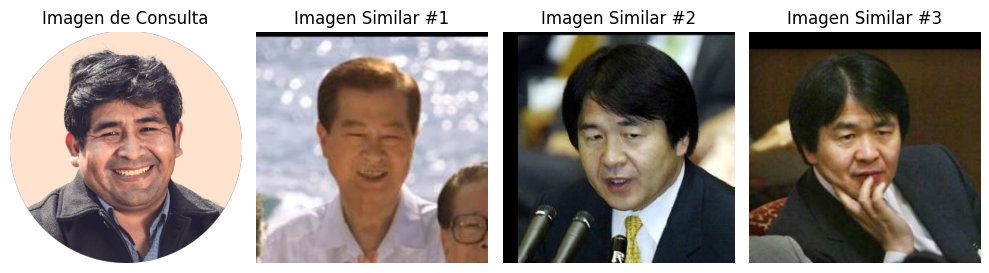

In [ ]:
start = time.process_time()
knn_pq_seq = knn_pq(faces_encoding, dataset, 3)
print(f'query time: {time.process_time() - start}')
display_images("teofilo.png", knn_pq_seq)

query time: 0.14113212099999828


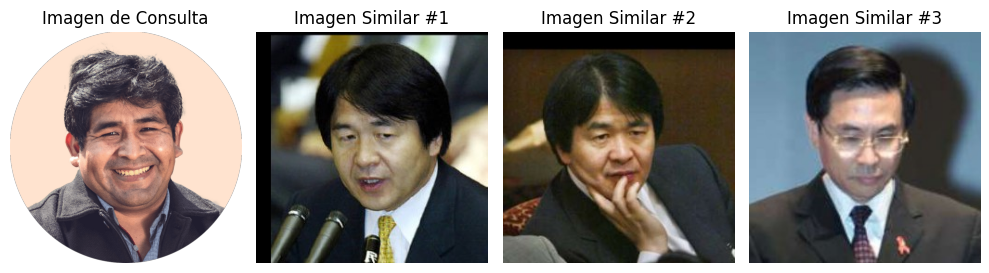

In [ ]:
start = time.process_time()
rtree_result =  knn_rtree(faces_encoding,  3, 12800, dataset)
print(f'query time: {time.process_time() - start}')
display_images("teofilo.png", rtree_result)

../images/Kim_Dae-jung/Kim_Dae-jung_0002.jpg => 0.46353045162973966
../images/Heizo_Takenaka/Heizo_Takenaka_0002.jpg => 0.4863025124754401
../images/Heizo_Takenaka/Heizo_Takenaka_0001.jpg => 0.49119902950618055
query time: 0.03311980800000924


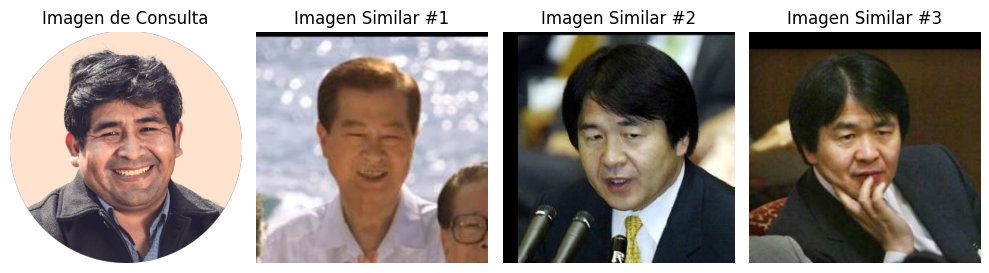

In [ ]:
ind = KDTree_index(dataset)
start = time.process_time()
kdtree_result = KDTree_Search(ind, 3, dataset)
print(f'query time: {time.process_time() - start}')
display_images("teofilo.png", kdtree_result)

query time: 0.00619646900000248


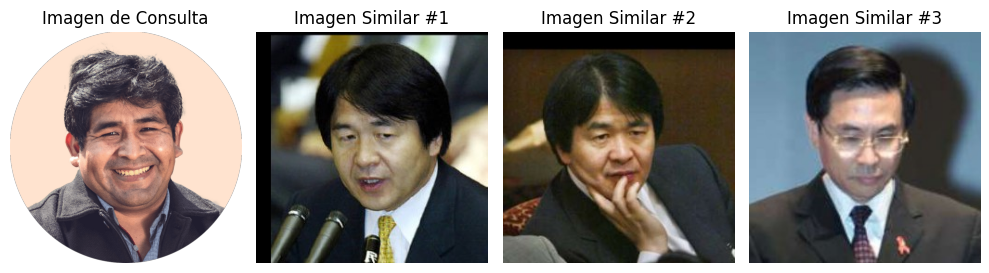

In [ ]:
start = time.process_time()
faiss_result = FaissIndex_Search(faces_encoding, 3, 12800, dataset)
print(f'query time: {time.process_time() - start}')
display_images("teofilo.png", faiss_result)